https://samuelkellum.github.io/FinalTutorial/

# Police Brutality in New Orleans
### Ajit Alapati and Samuel Kellum
## Milestone 1
We decided to meet in person to collaborate and discuss what data about New Orleans we wanted to explore. We first set up a GitHub repository to compile everything for our project, including the data sets.

We did face some initial challenges setting up the GitHub page because neither of us has ever created a GitHub page. Additionally, we had some minor issues initializing the repository with the GitHub page because of GitHub’s new authentication features. In August, GitHub required that we use personal authentication tokens instead of account passwords when using its version control on the command line. In August, GitHub required that we use personal authentication tokens instead of account passwords when using its version control on the command line.  We had no problems importing the data into the Jupyter Notebook and tidying the data by deleting unnecessary columns. We had already imported CSV files into a notebook in the labs. We had one minor problem with the del function syntax (which we found from a previous Final Tutorial example). We faced some more significant challenges in displaying the notebook on the GitHub page. We did not realize that all we had to do was download the notebook as an HTML export. We learn something new every day, which is to read all of the project instructions! If you are reading this on the webpage, and the page looks like a Jupyter Notebook, then that means we figured it out!

Our planned technologies, as of now, are Docker, the Jupyter Notebook, Python, and all of the libraries it provides. We have not yet discussed in detail the libraries that we will use, but we know we will be using Pandas, Numpy, and Matplotlib. We have each other’s phone numbers to contact each other about the project and will most likely meet throughout the semester one or two times per week in person to work on the project. Both of us were interested in data about police brutality and misconduct in New Orleans.

We wanted to look into policing violence and where these incidents were happening in the city. We found a couple of data sets on data.nola.gov about police misconduct complaints and deadly police encounters in New Orleans. These sorts of data sets open up many possible questions and avenues that we can go down. For example, we were discussing combining datasets to determine who and where these violent interactions were happening. Were they happening disproportionately in poor areas? Were they happening disproportionately towards African Americans?

In [1]:
## Loading libraries
# Load Pandas
import pandas as pd

# Load Numpy
import numpy as np

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')

# Load Requests
import requests

# Load Regex
import re

# Load BeautifulSoup
from bs4 import BeautifulSoup



### NOPD Misconduct Complaints

The source of the csv file: https://data.nola.gov/Public-Safety-and-Preparedness/NOPD-Misconduct-Complaints/gz2m-ef5u

This DataFrame contains information about misconduct complains filed against the New Orleans Police Department.

In [2]:
nopd_complaint_df = pd.read_csv('../_data/NOPD_Misconduct_Complaints.csv')
nopd_complaint_df.head()

,Incident Type,Complaint Tracking Number,Date Complaint Occurred,Date Complaint Received by NOPD (PIB),Date Complaint Investigation Complete,Complaint classification,Investigation status,Disposition,Bureau of Complainant,Division of Complainant,...,Rule Violation,Paragraph Violation,Unique Officer Allegation ID,Officer Race Ethnicity,Officer Gender,Officer Age,Officer years of service,Complainant Gender,Complainant Ethnicity,Complainant Age
0,Public Initiated,2016-0001-P,2016-01-01,2016-01-01,2016-07-21,DI-1,Completed,Unfounded,NaN,8th District,...,RULE 3: PROF CONDUCT,PARAGRAPH 01 - Professionalism,30664.0,NaN,NaN,NaN,NaN,Male,Black,NaN
1,Public Initiated,2016-0002-P,2016-01-02,2016-01-01,2016-08-03,DI-1,Completed,Exonerated,FOB - Field Operations Bureau,7th District,...,RULE 4: PERF OF DUTY,PARAGRAPH 04 - NEGLECT OF DUTY,30667.0,Black,Male,60,NaN,Female,White,NaN
2,Public Initiated,2016-0002-P,2016-01-02,2016-01-01,2016-08-03,DI-1,Completed,Exonerated,FOB - Field Operations Bureau,7th District,...,RULE 4: PERF OF DUTY,PARAGRAPH 04 - NEGLECT OF DUTY,30669.0,Black,Male,44,NaN,Female,White,NaN
3,Public Initiated,2016-0009-P,2016-01-04,2016-01-04,2017-03-20,DI-1,Completed,Unfounded,FOB - Field Operations Bureau,8th District,...,RULE 2: MORAL CONDUCT,PARAGRAPH 01 - ADHERENCE TO LAW,30671.0,White,Male,NaN,NaN,NaN,NaN,NaN
4,Public Initiated,2016-0006-P,2016-12-30,2016-01-04,2016-07-25,DI-1,Completed,Exonerated,FOB - Field Operations Bureau,Command Staff,...,RULE 4: PERF OF DUTY,PARAGRAPH 02 - INSTRUCTIONS FROM AUTHORITATIVE...,30674.0,Black,Male,54,NaN,Female,Black,50.0


Although almost all of the columns are informative, there are way more columns than we plan on using. We can tidy the data by only keeping the columns we plan on using.

In [3]:
for col in nopd_complaint_df.columns:
    print (col)

Incident Type
Complaint Tracking Number
Date Complaint Occurred
Date Complaint Received by NOPD (PIB)
Date Complaint Investigation Complete
Complaint classification
Investigation status
Disposition
Bureau of Complainant
Division of Complainant
Unit of Complainant
Unit Additional Details of Complainant
Working Status of Complainant
Shift of Complainant
Rule Violation
Paragraph Violation
Unique Officer Allegation ID
Officer Race Ethnicity
Officer Gender
Officer Age
Officer years of service
Complainant Gender
Complainant Ethnicity
Complainant Age


In [4]:
#Tidying data by only keeping columns we plan on using
nopd_complaint_df = nopd_complaint_df[['Investigation status','Complainant Ethnicity']]

In [5]:
nopd_complaint_df

,Investigation status,Complainant Ethnicity
0,Completed,Black
1,Completed,White
2,Completed,White
3,Completed,NaN
4,Completed,Black
...,...,...
5853,Initial,NaN
5854,Initial,NaN
5855,Initial,NaN
5856,Initial,Black


# Milestone 2

One of the first things we wanted to look at was the status of the investigations. Since this is a categorical variable, the most important thing we can look at is the counts of each observation.

In [6]:
nopd_complaint_df["Investigation status"].value_counts()

Completed    4626
Active        575
Forwarded     398
Initial       259
Name: Investigation status, dtype: int64

To visualize the distribution of the investigation statuses, a pie chart would look best.

<AxesSubplot:title={'center':'Investigation Status'}>

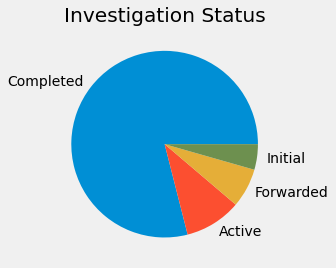

In [7]:
nopd_complaint_df["Investigation status"].value_counts().plot.pie(ylabel="",title="Investigation Status")

The next thing we wanted to look at was the distribution of the complainants' ethnicities. However, we have to clean up the data a little bit since the ethnicities were not entered consistently, as shown below.

In [8]:
nopd_complaint_df["Complainant Ethnicity"].value_counts()

Black           2195
White            725
Race-Unknown      93
Hispanic          73
B                 73
W                 20
Asian             12
w                  9
b                  7
black              6
white              1
Unknown            1
Unkown             1
BLACK              1
Indian             1
Name: Complainant Ethnicity, dtype: int64

We know that "Black," "B," "b," "black," and "BLACK" should all map to the same ethnicity, which we can fix by using the map() function. We can do this for all other ethnicities. The nice thing about the map() function is that we can exclude values that we do not want to map, such as Unknown, which will convert to NaN and not be included in the visualizations.

In [9]:
nopd_complaint_df["Complainant Ethnicity"] = nopd_complaint_df["Complainant Ethnicity"].map({
    'Black': 'Black',
    'black': 'Black',
    'BLACK': 'Black',
    'B': 'Black',
    'b': 'Black',
    'White': 'White',
    'white': 'White',
    'w': 'White',
    'W': "White",
    'Asian': 'Asian',
    'Indian': 'Asian',
    'Hispanic': 'Hispanic'
})

Now that the ethnicities are mapped properly, as shown below, we can make a visualization to show the distribution of the ethnicities that filed complaints.

In [10]:
nopd_complaint_df["Complainant Ethnicity"].value_counts()

Black       2282
White        755
Hispanic      73
Asian         13
Name: Complainant Ethnicity, dtype: int64

<AxesSubplot:title={'center':'Complainant Ethnicity'}>

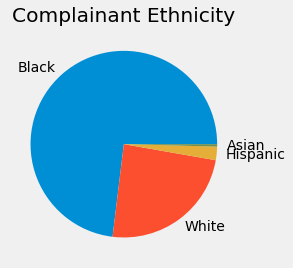

In [11]:
nopd_complaint_df["Complainant Ethnicity"].value_counts().plot.pie(ylabel="",title="Complainant Ethnicity")

We can also create a cross-tabulation between "Investigation status" and "Complainant Ethnicity" to view if the investigation status is different based on complainant ethnicities. To visalize this, we should create a stacked bar plot.

In [12]:
counts = pd.crosstab(nopd_complaint_df['Complainant Ethnicity'], nopd_complaint_df['Investigation status'],normalize=True)
ethnicity_given_status = counts.divide(counts.sum(axis=0), axis=1)
ethnicity_given_status

Investigation status,Active,Completed,Forwarded,Initial
Complainant Ethnicity,,,,
Asian,0.004367,0.004376,0.0,0.000000
Black,0.759825,0.726477,0.8,0.692308
Hispanic,0.021834,0.024799,0.0,0.000000
White,0.213974,0.244347,0.2,0.307692


<AxesSubplot:xlabel='Investigation status'>

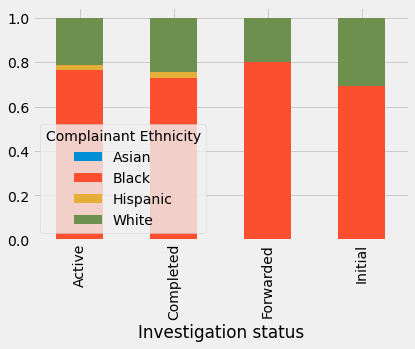

In [13]:
#Transposing the above table to make Investigation status the bars on the x-axis
(ethnicity_given_status.T).plot.bar(stacked=True)

### NOPD Use of Force 

We also want to analyze at the NOPD's use of force data. We will follow similar steps that we did for the NOPD Misconduct Complaints.

Source of the csv file: https://data.nola.gov/Public-Safety-and-Preparedness/NOPD-Use-of-Force-Incidents/9mnw-mbde

In [14]:
nopd_use_of_force_df = pd.read_csv('../_data/NOPD_Use_Of_Force_Incidents.csv')
nopd_use_of_force_df.head()

,PIB File Number,Date Occurred,Originating Bureau,Division level,Division,Unit,Working Status,Shift,Investigation status,Disposition,...,Subject Ethnicity,Subject Age,Subject Build,Subject Height,Subject Injured,Subject Hospitalized,Subject Arrested,Subject Arrest Charges,Use of Force Reason,Officer Injured
0,FTN2016-0112,03/23/2016,FOB - Field Operations Bureau,7th District,Evening Watch,NaN,Unknown Working Status,Unknown Shift Hours,Initial,Pending,...,Black,38,NaN,NaN,No,Yes,No,NaN,refuse verbal commands,No
1,FTN2016-0169,03/26/2016,FOB - Field Operations Bureau,6th District,B Platoon,NaN,NaN,NaN,Completed,Use Of Force Authorized,...,Black,27,Small,5'4'' to 5'6'',No,Yes,Yes,NaN,Resisting Lawful Arrest,No
2,FTN2016-0172,03/26/2016,FOB - Field Operations Bureau,7th District,Evening Watch,Patrol,Unknown Working Status,Unknown Shift Hours,Completed,Use Of Force Authorized,...,Black,37,Medium,5'10'' to 6'0'',No,No,No,NaN,refuse verbal commands,No | No | No
3,FTN2016-0168,03/26/2016,FOB - Field Operations Bureau,8th District,Narcotics,NaN,NaN,NaN,Completed,Use Of Force Authorized,...,White | Black,29 | 33,Large | Large,6'1'' to 6'3'' | 6'1'' to 6'3'',Yes | Yes,No | No,Yes | Yes,NaN,Resisting Lawful Arrest,No | No | No | No
4,FTN2016-0173,03/27/2016,FOB - Field Operations Bureau,7th District,Day Watch,NaN,NaN,NaN,Completed,Use Of Force Authorized,...,White,23,Small,5'10'' to 6'0'',Yes,Yes,Yes,NaN,Resisting Lawful Arrest,No | No


In [15]:
nopd_use_of_force_df = nopd_use_of_force_df[['Subject Ethnicity', 'Subject Injured', 'Subject Hospitalized']]
nopd_use_of_force_df.head()

,Subject Ethnicity,Subject Injured,Subject Hospitalized
0,Black,No,Yes
1,Black,No,Yes
2,Black,No,No
3,White | Black,Yes | Yes,No | No
4,White,Yes,Yes


In the third row, the ethnicity is listed as "White | Black." That is because the use of force instance represents two subjects, with one white person and one black person.

In [16]:
nopd_use_of_force_df['Subject Ethnicity'].value_counts().head(10)

Black                                    1908
White                                     333
Black | Black                             183
Black | Black | Black                      66
Hispanic                                   56
Black | Black | Black | Black              35
White | White                              19
Asian                                      14
Black | Black | Black | Black | Black      13
Black | White                              11
Name: Subject Ethnicity, dtype: int64

Since the majority of use of force cases involve one person, we have decided to remove cases involving multiple subjects, which is denoted by "|".

In [17]:
l = nopd_use_of_force_df["Subject Ethnicity"].unique()

l = [str(x) for x in l]
unique = [x for x in l if "|" not in x]
unique

['Black', 'White', 'nan', 'Asian', 'W', 'Hispanic', 'Race-Unknown', 'Indian']

Now we can map the ethnicities similar to the previous DataFrame and create a visualization.

In [18]:
nopd_use_of_force_df["Subject Ethnicity"] = nopd_use_of_force_df['Subject Ethnicity'].map({
    "Black": "Black",
    "White": "White",
    "W": "White",
    "Asian": "Asian",
    "Indian": "Asian",
    "Hispanic": "Hispanic",   
})

<AxesSubplot:title={'center':'Subject Ethnicity'}>

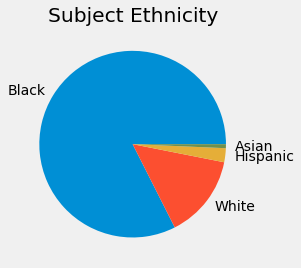

In [19]:
nopd_use_of_force_df["Subject Ethnicity"].value_counts().plot.pie(ylabel="",title="Subject Ethnicity")

One thing that would be interesting to look at is the distributions of the ethnicities when the subject was injured and hospitalized as a result of police use of force.

In [20]:
nopd_use_of_force_df["Subject Injured"] = nopd_use_of_force_df["Subject Injured"].map({
    "Yes" : "Yes",
    "No": "No"
})
nopd_use_of_force_df["Subject Hospitalized"] = nopd_use_of_force_df["Subject Hospitalized"].map({
    "Yes" : "Yes",
    "No" : "No"
})

To visualize the difference in ethnicity of the subject when they are injured or not, we should create a stacked bar plot from a cross-tabulation between "Subject Ethnicity" and "Subject Injured."

In [21]:
counts = pd.crosstab(nopd_use_of_force_df['Subject Ethnicity'], nopd_use_of_force_df['Subject Injured'],normalize=True)
ethnicity_given_injured = counts.divide(counts.sum(axis=0), axis=1)
ethnicity_given_injured

Subject Injured,No,Yes
Subject Ethnicity,,
Asian,0.007511,0.004444
Black,0.835300,0.780000
Hispanic,0.025751,0.017778
White,0.131438,0.197778


<AxesSubplot:xlabel='Subject Injured'>

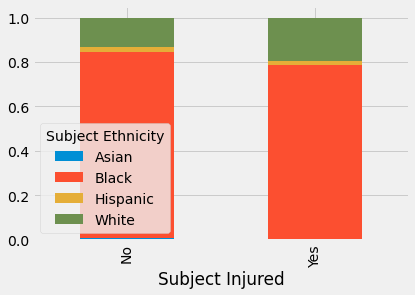

In [22]:
#Transposing the above table to make Subject Injured the two bars to compare
(ethnicity_given_injured.T).plot.bar(stacked=True)

We can do the same thing between for "Subject Hospitalized."

In [23]:
counts = pd.crosstab(nopd_use_of_force_df['Subject Ethnicity'], nopd_use_of_force_df['Subject Hospitalized'],normalize=True)
ethnicity_given_hospitalized = counts.divide(counts.sum(axis=0), axis=1)
ethnicity_given_hospitalized

Subject Hospitalized,No,Yes
Subject Ethnicity,,
Asian,0.007057,0.006689
Black,0.851800,0.781494
Hispanic,0.028229,0.017837
White,0.112915,0.193980


<AxesSubplot:xlabel='Subject Hospitalized'>

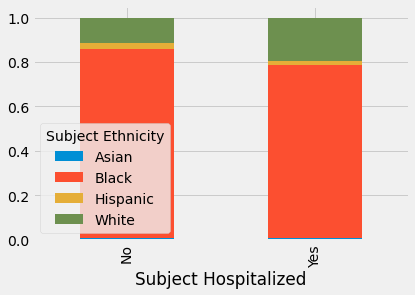

In [24]:
(ethnicity_given_hospitalized.T).plot.bar(stacked=True)

In the final project, we plan on comparing use of force data in New Orleans to Austin and Orlando.

### Austin Police Response To Resistance

Source of the csv file: https://data.austintexas.gov/Public-Safety/R2R-2015/iydp-s2cf


In [25]:
austin_police_df = pd.read_csv('../_data/Austin_Response_To_Resistance.csv')
austin_police_df.head()

,RIN,Primary Key,Date Occurred,Time Occurred,Location,Area Command,Nature of Contact,Reason Desc,R2R Level,Master Subject ID,...,Weapon Used 5,Number Shots,Subject Effects,Effect on Officer,Officer Organization Desc,Officer Commission Date,Officer Yrs of Service,X-Coordinate,Y-Coordinate,CouncilDistrict
0,"154,619","201,510,652",01/01/2015 12:00:00 AM,0220,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,NaN,NaN,NO COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,GEORGE 600 REG I PATROL,05/17/2013 12:00:00 AM,2,"3,115,416","10,070,416",9.0
1,"154,620","201,510,652",01/01/2015 12:00:00 AM,0225,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,NaN,NaN,MINOR INJURY,NO COMPLAINT OF INJURY/PAIN,GEORGE 700 REG I PATROL,05/10/2002 12:00:00 AM,13,"3,115,416","10,070,416",9.0
2,"155,009","201,510,652",01/01/2015 12:00:00 AM,,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,NaN,NaN,NO COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,GEORGE 300 REG I PATROL,11/30/2012 12:00:00 AM,2,"3,115,416","10,070,416",9.0
3,"154,764","201,520,457",01/02/2015 12:00:00 AM,0943,1900 FARO DR,HE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,3.0,356649076: 201520457,...,NaN,NaN,COMPLAINT OF INJURY/PAIN,COMPLAINT OF INJURY/PAIN,HENRY 100 REG III PATROL,06/20/2008 12:00:00 AM,7,"3,124,262","10,057,181",3.0
4,"154,859","201,520,457",01/02/2015 12:00:00 AM,0943,1900 FARO DR,HE,DISPATCHED CALL,"IN CUSTODY, MAINTAINING CONTROL",3.0,356649076: 201520457,...,NaN,NaN,COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,HENRY 100 REG III PATROL,01/02/2009 12:00:00 AM,6,"3,124,262","10,057,181",3.0


In [26]:
#Tidying data by only keeping columns we plan on using
austin_police_df = austin_police_df[["Subject Race", "Subject Ethnicity", "Subject Effects"]]

In [27]:
austin_police_df["Subject Race"].value_counts()

W    2116
B     989
A      20
M       7
U       5
P       2
I       1
Name: Subject Race, dtype: int64

Once again, we can map the subject races to make them easier to read.

In [28]:
austin_police_df["Subject Race"] = austin_police_df["Subject Race"].map({
    'W': 'White',
    'B': 'Black',
    'A': 'Asian',
    'P': 'Asian',
    'I': 'Asian'})

Unlike the New Orleans data frame, we have to distinguish between white and hispanic subjects slightly differently. We want to change the subject's "race" from White to Hispanic if they are Hispanic.

To be consistent with the New Orleans DataFrames, and more technically correct between race and ethnicity (since Hispanic people are techncially White), we should change the subject race column to subject ethnicity and delete the subjet race column.

In [29]:
austin_police_df.loc[austin_police_df['Subject Ethnicity'] == "H", 'Subject Race'] = "Hispanic"
austin_police_df["Subject Ethnicity"] = austin_police_df["Subject Race"]
del austin_police_df ["Subject Race"]

<AxesSubplot:title={'center':'Subject Ethnicity'}>

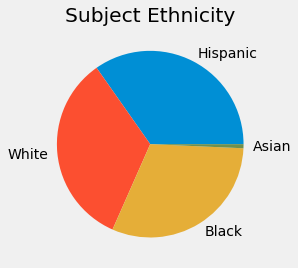

In [30]:
austin_police_df["Subject Ethnicity"].value_counts().plot.pie(ylabel="",title="Subject Ethnicity")

To find out if the subject was injured from the encounter or not, we need to modify map the "Subject Effects" column to a new column that indicates whether or not the subject was injured. 

It is important to note that we will assume that the subject is not injured if there was no injury observed.

In [31]:
austin_police_df['Subject Effects'].unique()

array(['NO COMPLAINT OF INJURY/PAIN', 'MINOR INJURY',
       'COMPLAINT OF INJURY/PAIN', nan,
       'COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED',
       'MINOR INJURY; COMPLAINT OF INJURY/PAIN', 'DEATH',
       'SERIOUS INJURY', 'SERIOUS INJURY; MINOR INJURY',
       'MINOR INJURY; NO COMPLAINT OF INJURY/PAIN',
       'COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED; NO COMPLAINT OF INJURY/PAIN',
       'COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED',
       'MINOR INJURY; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED',
       'SERIOUS INJURY; COMPLAINT OF INJURY/PAIN'], dtype=object)

In [32]:
austin_police_df['Subject Injured'] = austin_police_df['Subject Effects'].map({
"NO COMPLAINT OF INJURY/PAIN": "No",
"COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED": "No",
"COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED; NO COMPLAINT OF INJURY/PAIN": "No",
"COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED": "No",
"COMPLAINT OF INJURY/PAIN" : "Yes",
"MINOR INJURY; COMPLAINT OF INJURY/PAIN": "Yes",
"DEATH": "Yes",
"SERIOUS INJURY": "Yes",
"SERIOUS INJURY; MINOR INJURY": "Yes",
"MINOR INJURY; NO COMPLAINT OF INJURY/PAIN": "Yes",
"MINOR INJURY; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED": "Yes",
"SERIOUS INJURY; COMPLAINT OF INJURY/PAIN": "Yes"})

In [33]:
#We do not need this column anymore
del austin_police_df['Subject Effects']

In [34]:
austin_police_df['Subject Injured'].value_counts()

No     2139
Yes     492
Name: Subject Injured, dtype: int64

Once again, we can complete a cross-tabulation between ethnicity and whether or not the subject was injured.

In [35]:
counts = pd.crosstab(austin_police_df['Subject Ethnicity'], austin_police_df['Subject Injured'],normalize=True)
ethnicity_given_injured = counts.divide(counts.sum(axis=0), axis=1)
ethnicity_given_injured

Subject Injured,No,Yes
Subject Ethnicity,,
Asian,0.006497,0.002105
Black,0.321339,0.254737
Hispanic,0.347826,0.336842
White,0.324338,0.406316


<AxesSubplot:xlabel='Subject Injured'>

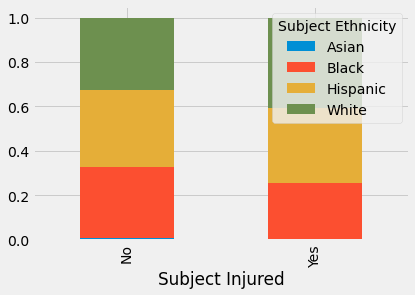

In [36]:
(ethnicity_given_injured.T).plot.bar(stacked=True)

### Orlando Police Department Response to Resistance
<br>
Source of the csv file: <a>https://data.cityoforlando.net/Orlando-Police/OPD-Response-To-Resistance/ap4w-p9kt</a>

We can follow similar steps for Austin that we did for the Orlando and New Orlenas DataFrames.

In [37]:
orlando_police_df = pd.read_csv("../_data/OPD_Response_To_Resistance.csv")
orlando_police_df.head()

,Incident Number,Incident Date Time,Incident Location,Officers Involved,Officers Race,Officers Ethnicity,Officers Sex,Officer Battered,Officer Injured,Officer Medical Treatment,...,Offenders Involved,Offenders Race,Offenders Ethnicity,Offenders Sex,Offender Arrested,Offender Injured,Offender Medical Treatment,Witnesses Involved,Status,Location
0,2018-00079161,02/25/2018 10:23:00 PM,26TH / 15 LAWSONA BLV,1.0,W,NH,M,Yes,No,No,...,1.0,W,NH,M,Felony,Yes,Yes,0.0,Unmapped,NaN
1,2013-00544482,12/29/2013 11:02:00 PM,NaN,1.0,B,NH,M,No,No,No,...,0.0,U,NH,U,Not Arrested,No,No,0.0,Unmapped,NaN
2,2018-00478744,12/14/2018 08:17:00 AM,9200 Block of AIRPORT BV,1.0,W,NH,M,No,No,No,...,1.0,B,NH,M,Felony,No,No,0.0,Mapped,"(28.43097505, -81.31134146)"
3,2017-00316840,08/14/2017 01:50:00 AM,EW WBO / LONG ST,3.0,W;W;W,NH;NH;NH,M;M;M,No,No,No,...,1.0,B,NH,M,Misdemeanor,No,No,0.0,U,NaN
4,IncidentNumber,NaN,IncidentLocation,NaN,OfficersRace,OfficersEthnicity,OfficersSex,OfficerBattered,OfficerInjured,OfficerMedicalTreatment,...,NaN,OffendersRace,OffendersEthnicity,OffendersSex,OffenderArrested,OffenderInjured,OffenderMedicalTreatment,NaN,Status,NaN


Simialar to the New Orleans Use of Force DataFrame, cases with multiple subjects are included in the same row, but this time the subjects are separated by a semicolon. Once again, we will exclude cases with multiple subjects.

In [38]:
# some cleaning of the data
l = orlando_police_df["Offenders Race"].unique()
l = [str(x) for x in l]
unique = [x for x in l if ";" not in x]
unique

['W', 'U', 'B', 'OffendersRace', 'A']

In [39]:
orlando_police_df["Offenders Race"] = orlando_police_df["Offenders Race"].map({
    'W': 'White',
    'B': 'Black',
    'A': 'Asian'
    })

In [40]:
orlando_police_df["Offenders Ethnicity"].unique()

array(['NH', 'OffendersEthnicity', 'HI', 'NH;NH', 'HI;NH', 'NH;NH;NH',
       'HI;HI', 'NH;NH;NH;NH;NH;', 'NH;NH;NH;NH', 'NH;HI',
       'NH;NH;NH;NH;NH', 'HI;HI;HI', 'NH;HI;NH', 'HI;NH;HI', 'HI;HI;NH',
       'NH;HI;HI', 'HI;NH;NH', 'HI;HI;HI;HI;HI'], dtype=object)

We should rename the columns to keep the formatting consistent with the other cities.

In [41]:
orlando_police_df = orlando_police_df.rename(columns={
    "Offenders Ethnicity": "Hispanic",
    "Offenders Race": "Subject Ethnicity",
    "Offender Injured": "Subject Injured"
})

In [42]:
orlando_police_df["Hispanic"] = orlando_police_df["Hispanic"].map({
    "NH": False,
    "HI": True
})

In [43]:
orlando_police_df.loc[orlando_police_df['Hispanic'] == True, 'Subject Ethnicity'] = "Hispanic"

<AxesSubplot:title={'center':'Subject Ethnicity'}>

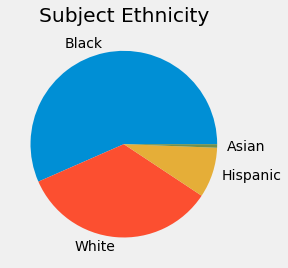

In [44]:
orlando_police_df["Subject Ethnicity"].value_counts().plot.pie(ylabel="",title="Subject Ethnicity")

In [45]:
counts = pd.crosstab(orlando_police_df['Subject Ethnicity'], orlando_police_df['Subject Injured'],normalize=True)
ethnicity_given_injured = counts.divide(counts.sum(axis=0), axis=1)
ethnicity_given_injured

Subject Injured,No,Yes
Subject Ethnicity,,
Asian,0.003955,0.007758
Black,0.606215,0.536546
Hispanic,0.087571,0.086566
White,0.302260,0.369130


<AxesSubplot:xlabel='Subject Injured'>

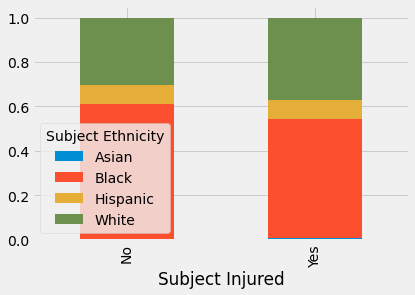

In [46]:
(ethnicity_given_injured.T).plot.bar(stacked=True)

### Plan for Final Tutorial
<p>We plan to use the data from Austin and Orlando to compare to New Orleans. According to the New Orleans Data Center, Austin and Orlando are two cities that New Orleans aspires to be like due to the growth of their economy and opportunities. We believe that the use of force by police and whether they proportionately act might effect how citizes trust their government. There are opportunities here to include economic data as well. However, for now, we hope to search deeper in whether currently, each city proportionately uses force on criminals based on chi-squared tests or other tests of proportions. We believe that the relationship between the government and its citizens is very important in a city's growth and prosperity and we hope to shine a light on this relationship in New Orleans. </p>
<p>Additionally, we think that the outcome of the cases when police use force is important. For that reason, we plan on doing similar analysis comparing the distribution of the ethnicities when the subject was injured and not injured.</p>

In [47]:
url = 'https://www.census.gov/quickfacts/fact/table/orlandocityflorida,neworleanscitylouisiana,austincitytexas/LND110210'
r = requests.get(url)
r.status_code

200

In [48]:
soup = BeautifulSoup(r.content, 'html.parser')

In [49]:
pretty = soup.prettify()
demographic_df = pd.read_html(pretty)[1]
demographic_df = demographic_df.loc[11:17].copy()

In [50]:
demographic_df = demographic_df.rename(columns={'Population' : 'Race', 'Unnamed: 1' : 'Orlando', 'Unnamed: 2' : 'New Orleans', 'Unnamed: 3' : 'Austin'})

In [51]:
demographic_df

,Race,Orlando,New Orleans,Austin
11,"White alone, percent",  61.3%,  33.9%,  72.6%
12,"Black or African American alone, percent (a)",  24.5%,  59.5%,  7.8%
13,"American Indian and Alaska Native alone, perce...",  0.2%,  0.2%,  0.7%
14,"Asian alone, percent (a)",  4.2%,  2.9%,  7.6%
15,Native Hawaiian and Other Pacific Islander alo...,  0.0%,  0.0%,  0.1%
16,"Two or More Races, percent",  3.5%,  1.9%,  3.5%
17,"Hispanic or Latino, percent (b)",  32.6%,  5.5%,  33.9%


In [52]:
demographic_df['Orlando'] = demographic_df['Orlando'].str[4:]
demographic_df['New Orleans'] = demographic_df['New Orleans'].str[4:]
demographic_df['Austin'] = demographic_df['Austin'].str[4:]

In [53]:
demographic_df['Orlando'] = demographic_df['Orlando'].str[:-1]
demographic_df['Orlando'] = pd.to_numeric(demographic_df['Orlando'])

demographic_df['New Orleans'] = demographic_df['New Orleans'].str[:-1]
demographic_df['New Orleans'] = pd.to_numeric(demographic_df['New Orleans'])

demographic_df['Austin'] = demographic_df['Austin'].str[:-1]
demographic_df['Austin'] = pd.to_numeric(demographic_df['Austin'])


In [54]:
demographic_df 

,Race,Orlando,New Orleans,Austin
11,"White alone, percent",61.3,33.9,72.6
12,"Black or African American alone, percent (a)",24.5,59.5,7.8
13,"American Indian and Alaska Native alone, perce...",0.2,0.2,0.7
14,"Asian alone, percent (a)",4.2,2.9,7.6
15,Native Hawaiian and Other Pacific Islander alo...,0.0,0.0,0.1
16,"Two or More Races, percent",3.5,1.9,3.5
17,"Hispanic or Latino, percent (b)",32.6,5.5,33.9


In [55]:
demographic_df['Race'].unique()

array(['White alone, percent',
       'Black or African American alone, percent  (a)',
       'American Indian and Alaska Native alone, percent  (a)',
       'Asian alone, percent  (a)',
       'Native Hawaiian and Other Pacific Islander alone, percent  (a)',
       'Two or More Races, percent', 'Hispanic or Latino, percent  (b)'],
      dtype=object)

In [56]:
demographic_df["Race"] = demographic_df["Race"].map({
    'White alone, percent': 'White',
    'Black or African American alone, percent  (a)': 'Black',
    'American Indian and Alaska Native alone, percent  (a)': 'Asian',
    'Asian alone, percent  (a)': 'Asian',
    'Native Hawaiian and Other Pacific Islander alone, percent  (a)': 'Asian',
    'Two or More Races, percent': 'Mixed',
    'Hispanic or Latino, percent  (b)': 'Hispanic'
})

In [57]:
demographic_df = demographic_df.groupby('Race').sum()

<AxesSubplot:title={'center':'Orlando Demographics'}>

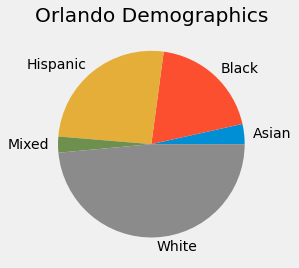

In [58]:
demographic_df['Orlando'].plot.pie(ylabel="",title="Orlando Demographics")

<AxesSubplot:title={'center':'New Orleans Demographics'}>

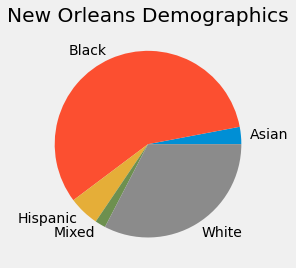

In [59]:
demographic_df['New Orleans'].plot.pie(ylabel="",title="New Orleans Demographics")

<AxesSubplot:title={'center':'Austin Demographics'}>

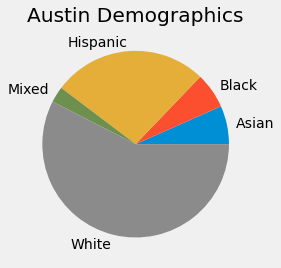

In [60]:
demographic_df['Austin'].plot.pie(ylabel="",title="Austin Demographics")